In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}] # in grid search we have to define the dictionary in list for lamda,if there are multiple lamda then it has multiple dict,if you use random serach then you just define the Distribution instead of list
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=.9) # take the 90% data for train data
#using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='f1',cv=5) # applying grid serach(cv is 5,default is 3) and LogisticReg we use just default parameter
model.fit(X_train,y_train)
print(model.best_estimator_) # show the best estimator where shows what value of c is best and other params
print(model.score(X_test,y_test)) # show the predicted score in test data

G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.9589041095890412


In [5]:
# More Sparsity (Fewer elements of w* being non-zero) by increasing Lambda
import numpy as np
clf = LogisticRegression(C=0.1, penalty='l1'); # if we increase C means decrease lamda(lamda decresing means overfitting because there are less regularizer term) in L1 regularizer then more sparsity(more elements are zero) are increase
clf.fit(X_train, y_train)
w =clf.coef_
print(np.count_nonzero(w))

G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


8


In [6]:
clf = LogisticRegression(C=0.01,penalty='l1') #lamda=100
clf.fit(X_train,y_train)
w = clf.coef_
print(np.count_nonzero(w))

4


G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
clf = LogisticRegression(C=0.001,penalty='l1') #lamda=1000
clf.fit(X_train,y_train)
w = clf.coef_
print(np.count_nonzero(w))

3


G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
clf = LogisticRegression(C=10,penalty='l1') #lamda=0.1 #lamda decreases the model is overfitt and lamda is increase the model is underfit, if the model is underfit the sparsity is increased
clf.fit(X_train,y_train)
w = clf.coef_
print(np.count_nonzero(w))

G:\Anaconda installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


14


G:\Anaconda installation\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [1]:
#Linear Regression using Boston datasets
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape) # total are 506 data points and 13 features

(506, 13)


In [2]:
print(boston.feature_names) # These are the attributes name of the data set 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
print(boston.target) # the o/p data

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head()) # show the value of 12 attributes/features in boston data

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [6]:
bos['PRICE'] = boston.target  # add a new column in dataframe which includes the target
X = bos.drop('PRICE',axis=1) # X stores everything except price
y = bos['PRICE'] # Y stores label of every points

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y) # split train test with default 70% around
X1_train = X_train
X1_test = X_test
print(X1_train.shape)
print(X1_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


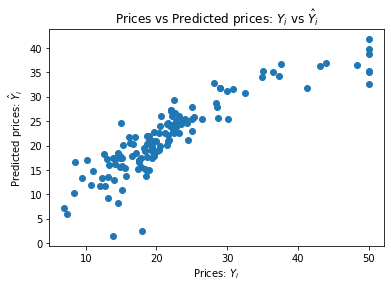

In [9]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
lm = LinearRegression() # linear reg has imp parameter is 'normalize' which is similar as standard scalar,each colomun's value subtract from means and divide from variance in standard scalar,but in 'normalization' each point in row subtract from mean and divide from l2(manhattan) norm
lm.fit(X_train, Y_train) # fit the train data in log reg
Y_pred = lm.predict(X_test) # predict the o/p data
plt.scatter(Y_test, Y_pred) # plotting a scatter plot of Y_test and Y_pred value
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

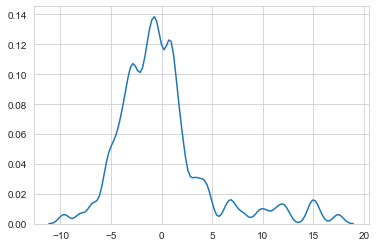

In [10]:
#distribution of errors, plot between error in probability
delta_y = Y_test - Y_pred
import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),bw=0.5) # here show a pdf on error,here the pdf is maximum in 0 value,it means the diff is 0 on Y_pred and Y_test value is max,there are more error in neg.side,to overcome this we have to use Feature Eng(f1*f2,f1^2 etc) and use regularization removing overfit,but lr reg has no regularization term in scikit learn
plt.show()

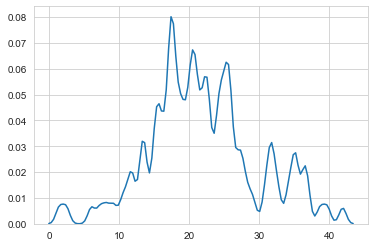

In [11]:
# distribution of y_predict, 
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred),bw=0.5) # here plot a pdf on Y_pred value,most of the value is 13 in Y_pred
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # applying standard scalar in train data,it means each coloumn's value subtract from mean and divide from variance
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
import numpy as np
from sklearn import linear_model
rng = np.random.RandomState(0)
y = rng.randn(X_train)
x = rng.randn(Y_train)
clf = linear_model.SGDRegressor(max_iter=10000, tol=1e-3, penalty=None, eta0=0.1)
clf.fit(x,y)

TypeError: 'DataFrame' object cannot be interpreted as an integer